# Notebook 2: Applying Pandas to Station Observation Data

### By Tyson Stewart

Pandas is a very powerful Python package that can help with processing data efficently so that it can be displayed with packages such as matplotlib. To illustrate this, let's take observation data from a weather station and graph it.

#### Step 1: Import Data

To begin, we need to import the data that we will process in pandas. For observation data there are two options, downloading the file and importing it into Python manually, or importing the data straight from the internet with Python doing all of the work. Since the process is essentially the same code-wise for each let's opt to process the data straight from the internet. For our example, we will be utilizing the [Iowa Environmental Mesonet's ASOS data archive](https://mesonet.agron.iastate.edu/request/download.phtml) which provides archive station observations of automated airport stations across the US. While there are many stations to pick from, we will be looking at observations from the airport in DeKalb, IL on January 1st, 2025.

To start let's import all of the packages we will be using and save the data into a variable using the read_csv function.

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#Link to the CSV file from IEM
obs_link = "https://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?station=DKB&data=all&year1=2025&month1=1&day1=1&year2=2025&month2=1&day2=1&tz=Etc%2FUTC&format=onlycomma&latlon=no&elev=no&missing=empty&trace=0.0001&direct=no&report_type=3&report_type=4"

obs = pd.read_csv(obs_link)

#### Step 2: Filter Data
As we can see above, our observation data was successfully imported into Python and placed into a dataframe by Pandas. Using this, we can easily look at the observation data and what each observation entry contains. For example, we can look at all of the different dataframe fields using:

In [2]:
obs.columns

Index(['station', 'valid', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i',
       'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2', 'skyc3', 'skyc4',
       'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes', 'ice_accretion_1hr',
       'ice_accretion_3hr', 'ice_accretion_6hr', 'peak_wind_gust',
       'peak_wind_drct', 'peak_wind_time', 'feel', 'metar', 'snowdepth'],
      dtype='object')

This gives us a list of variables that are contained in our dataframe. Some like time ("valid") and temperature ("tmpf") are very important while others like weather and METAR codes are not as important. Thankfully, we can easily filter these terms out using pandas, as seen in the code below.

In [3]:
#Creating a new dataframe with filtered results of original
obs_new = obs.filter(items=["station","valid","tmpf","dwpf","relh","mslp","vsby","sknt"])

In [4]:
obs_new

,station,valid,tmpf,dwpf,relh,mslp,vsby,sknt
0,DKB,2025-01-01 00:15,33.0,30.7,91.14,NaN,10.0,10.0
1,DKB,2025-01-01 00:35,33.0,31.0,92.25,NaN,10.0,9.0
2,DKB,2025-01-01 00:55,33.0,31.0,92.25,NaN,10.0,8.0
3,DKB,2025-01-01 01:15,32.5,31.5,96.05,NaN,10.0,8.0
4,DKB,2025-01-01 01:35,33.0,31.5,94.14,NaN,10.0,8.0
...,...,...,...,...,...,...,...,...
67,DKB,2025-01-01 22:35,25.7,17.6,70.99,NaN,10.0,12.0
68,DKB,2025-01-01 22:55,25.0,17.6,73.09,NaN,10.0,9.0
69,DKB,2025-01-01 23:15,24.6,17.6,74.32,NaN,10.0,7.0
70,DKB,2025-01-01 23:35,24.3,17.6,75.26,NaN,10.0,8.0


#### Step 3: Processing and Plotting the Data
With the filter applied we can now begin to process and plot the data. First, let's choose a variable to plot. For our example let's plot temperature (though as you will see shortly, pretty much any variable can be selected for this). First let's isolate the temperature data into it's own variable and then plot it using matplotlib.

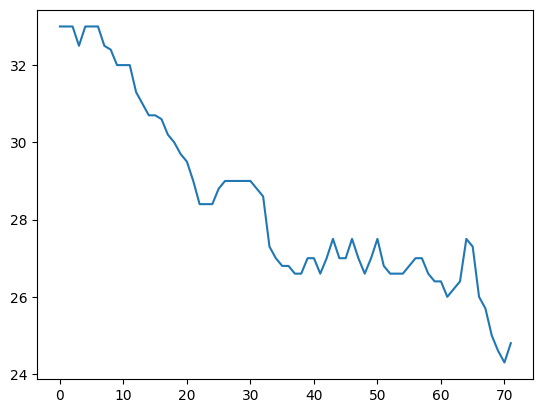

In [5]:
temp_F = obs_new["tmpf"]

plt.plot(temp_F)

Look at that! We now have a rudimentary line graph of our temperature observations. However, let's say we wanted to graph another variable (say dew point temperature) on top of this. We can do that via matplotlib as well.

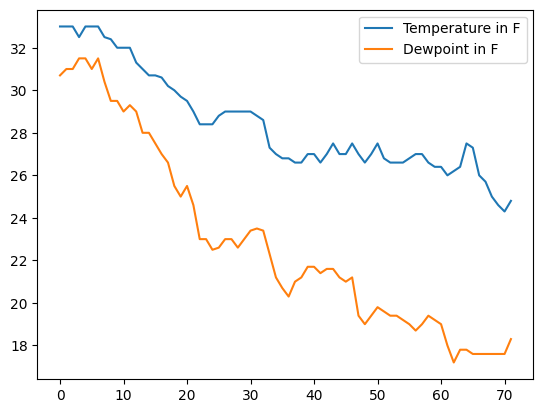

In [6]:
dewp_F = obs_new["dwpf"]

plt.plot(temp_F, label = "Temperature in F")
plt.plot(dewp_F, label = "Dewpoint in F")
plt.legend()
plt.show()

We can continue to optimize this graph via matplotlib (adding a title, axis labels, changing the x axis to time units, changing line colors, etc.) but regardless of the graph we make the point remains. With pandas it is incredibly easy to take input data and process it in a way that can be visualized. I encourage you to take this process and try it with other data sources and graph types! For more info on the different graph types supported by matplotlib [please check out this page on the matplotlib documentation website.](https://matplotlib.org/stable/plot_types/index.html)